In [130]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import scipy.stats as st
import seaborn as sns
from scipy.stats import norm

In [100]:
f = open('../instance_files/instance_iceice_rand_rall', 'rb')
agg_as = pickle.load(f)
agg_bs = pickle.load(f)
agg_cs = pickle.load(f)
phi2Ds = pickle.load(f)
cplxs_iceice_rand = pickle.load(f)
dds_iceice_rand = pickle.load(f)
f.close()

f = open('../instance_files/instance_iceice_flat_rall', 'rb')
agg_as = pickle.load(f)
agg_bs = pickle.load(f)
agg_cs = pickle.load(f)
phi2Ds = pickle.load(f)
cplxs_iceice_flat = pickle.load(f)
dds_iceice_flat = pickle.load(f)
f.close()

f = open('../instance_files/instance_db_iceagg_rand', 'rb')
results = pickle.load(f)
agg_as, agg_bs, agg_cs, phi2Ds, cplxs, dds_iceagg_rand= \
                results['agg_as'], results['agg_bs'], results['agg_cs'], results['phi2Ds'], results['cplxs'], results['dds']
f.close()
f = open('../instance_files/instance_db_iceagg_flat', 'rb')
results = pickle.load(f)
agg_as, agg_bs, agg_cs, phi2Ds, cplxs, dds_iceagg_flat= \
                results['agg_as'], results['agg_bs'], results['agg_cs'], results['phi2Ds'], results['cplxs'], results['dds']
f.close()
f = open('../instance_files/instance_db_aggagg_rand', 'rb')
results = pickle.load(f)
agg_as, agg_bs, agg_cs, phi2Ds, cplxs, dds_aggagg_rand= \
                results['agg_as'], results['agg_bs'], results['agg_cs'], results['phi2Ds'], results['cplxs'], results['dds']
f.close()
f = open('../instance_files/instance_db_aggagg_flat', 'rb')
results = pickle.load(f)
agg_as, agg_bs, agg_cs, phi2Ds, cplxs, dds_aggagg_flat= \
                results['agg_as'], results['agg_bs'], results['agg_cs'], results['phi2Ds'], results['cplxs'], results['dds']
f.close()

In [171]:
large = 20; med = 16; small = 12
params = {'axes.titlesize': med,
          'legend.fontsize': small,
          'figure.figsize': (7,7),
          'axes.labelsize': med,
          'xtick.labelsize': small,
          'ytick.labelsize': small,
          'figure.titlesize': large,
          "font.family": "serif"}
plt.rcParams.update(params)

In [31]:
#RAND
ct_iceice_rand = np.sum(dds_iceice_rand >= 0)
ct_iceagg_rand = np.sum(dds_iceagg_rand >= 0)
ct_aggagg_rand = np.sum(dds_aggagg_rand >= 0)
print(ct_iceice_rand, ct_iceagg_rand, ct_aggagg_rand)

#FLAT
ct_iceice_flat = np.sum(dds_iceice_flat >= 0)
ct_iceagg_flat = np.sum(dds_iceagg_flat >= 0)
ct_aggagg_flat = np.sum(dds_aggagg_flat >= 0)
print(ct_iceice_flat, ct_iceagg_flat, ct_aggagg_flat)


207 48280 6942
12439 44441 14125


In [54]:
#RAND
print(np.min(dds_iceice_rand),np.max(dds_iceice_rand)) 
print(np.min(dds_iceagg_rand),np.max(dds_iceagg_rand))
print(np.min(dds_aggagg_rand),np.max(dds_aggagg_rand))

#FLAT
print(np.min(dds_iceice_flat),np.max(dds_iceice_flat)) 
print(np.min(dds_iceagg_flat),np.max(dds_iceagg_flat))
print(np.min(dds_aggagg_flat),np.max(dds_aggagg_flat))

-0.23862364095362132 0.07853972103272633
-0.1855708926785205 0.09970195889890059
-7.787957490886586 0.34142026925454483
-0.23624342637109502 0.18287739618162038
-0.2653218783700846 0.10077034821778189
-22.569721647878037 0.7851837490912237


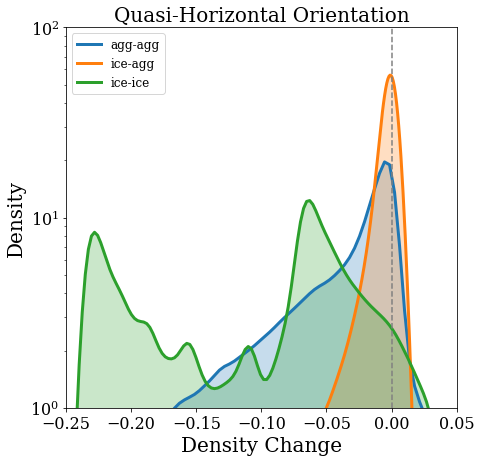

In [151]:
# Iterate through collections
dds_aggagg_flat_ext= dds_aggagg_flat[(dds_aggagg_flat<np.quantile(dds_aggagg_flat, .98)) & (dds_aggagg_flat>np.quantile(dds_aggagg_flat, .02))]
dds_iceagg_flat_ext= dds_iceagg_flat[(dds_iceagg_flat<np.quantile(dds_iceagg_flat, .98)) & (dds_iceagg_flat>np.quantile(dds_iceagg_flat, .02))]
dds_iceice_flat_ext= dds_iceice_flat[(dds_iceice_flat<np.quantile(dds_iceice_flat, .98)) & (dds_iceice_flat>np.quantile(dds_iceice_flat, .02))]
data_list = [dds_aggagg_flat_ext, dds_iceagg_flat_ext, dds_iceice_flat_ext]
label = ['agg-agg', 'ice-agg', 'ice-ice']
for c,coll in enumerate(data_list):
    # Draw the density plot
    sns.distplot(coll, hist = False, kde = True,
                 kde_kws = {'linewidth': 3, 'shade':True, 'bw': 0.005},
                 label = label[c])
plt.gca().set(xlabel='Density Change', ylabel='Density', title='Quasi-Horizontal Orientation');
plt.axvline(x=0.0, color='grey', linestyle='--')
plt.xlim(-.25, 0.05)
plt.yscale('log')
plt.ylim(1.0, 100)
plt.legend()

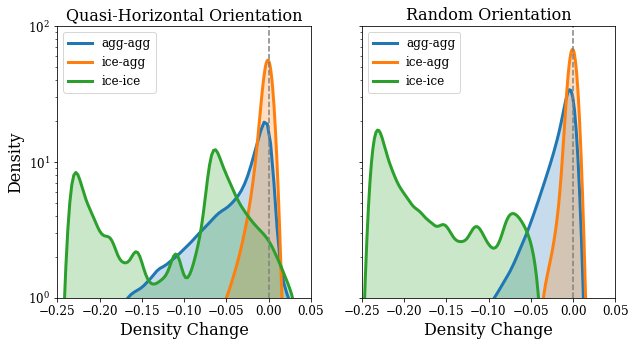

In [174]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(10,5))

# Iterate through collections
dds_aggagg_flat_ext= dds_aggagg_flat[(dds_aggagg_flat<np.quantile(dds_aggagg_flat, .98)) & (dds_aggagg_flat>np.quantile(dds_aggagg_flat, .02))]
dds_iceagg_flat_ext= dds_iceagg_flat[(dds_iceagg_flat<np.quantile(dds_iceagg_flat, .98)) & (dds_iceagg_flat>np.quantile(dds_iceagg_flat, .02))]
dds_iceice_flat_ext= dds_iceice_flat[(dds_iceice_flat<np.quantile(dds_iceice_flat, .98)) & (dds_iceice_flat>np.quantile(dds_iceice_flat, .02))]
data_list = [dds_aggagg_flat_ext, dds_iceagg_flat_ext, dds_iceice_flat_ext]
label = ['agg-agg', 'ice-agg', 'ice-ice']
for c,coll in enumerate(data_list):
    # Draw the density plot
    sns.distplot(coll, hist = False, kde = True, ax=ax1,
                 kde_kws = {'linewidth': 3, 'shade':True, 'bw': 0.005},
                 label = label[c])
ax1.set_xlabel('Density Change')
ax1.set_ylabel('Density')
ax1.set_title('Quasi-Horizontal Orientation')
ax1.axvline(x=0.0, color='grey', linestyle='--')
ax1.set_xlim(-.25, 0.05)
ax1.set_yscale('log')
ax1.set_ylim(1.0, 100)
ax1.legend()

# Iterate through collections
dds_aggagg_rand_ext= dds_aggagg_rand[(dds_aggagg_rand<np.quantile(dds_aggagg_rand, .98)) & (dds_aggagg_rand>np.quantile(dds_aggagg_rand, .02))]
dds_iceagg_rand_ext= dds_iceagg_rand[(dds_iceagg_rand<np.quantile(dds_iceagg_rand, .98)) & (dds_iceagg_rand>np.quantile(dds_iceagg_rand, .02))]
dds_iceice_rand_ext= dds_iceice_rand[(dds_iceice_rand<np.quantile(dds_iceice_rand, .98)) & (dds_iceice_rand>np.quantile(dds_iceice_rand, .02))]
data_list = [dds_aggagg_rand_ext, dds_iceagg_rand_ext, dds_iceice_rand_ext]
label = ['agg-agg', 'ice-agg', 'ice-ice']
for c,coll in enumerate(data_list):
    # Draw the density plot
    sns.distplot(coll, hist = False, kde = True, ax=ax2,
                 kde_kws = {'linewidth': 3, 'shade': True, "bw":0.005},
                 label = label[c])
plt.gca().set(xlabel='Density Change', title='Random Orientation');
plt.xlim(-.25, 0.05)
plt.axvline(x=0.0, color='grey', linestyle='--')
plt.yscale('log')
plt.ylim(1.0, 100)
plt.legend()
plt.savefig('../plots/dd_subplot_allcollections.png')

(161280,)

In [61]:
def calculate_error(data, numaspectratios, ch):
    mean = np.mean(data)

    std = np.std(data)
    shape = (mean/std)**2
    scale = (std**2)/mean
    shapech = mean/(numaspectratios*ch)

    pos_error = mean + std
    neg_error = mean - std

    min_data = min(data)
    max_data = max(data)

    return(pos_error, neg_error, min_data, max_data, mean)   

def mode_of_hist(data):
    bins = (np.max(data) - np.min(data))/0.01
    n, bins, patches = plt.hist(data, bins=int(bins), normed=True,
                                color='navy',range=(min(data), max(data)))
    mode = bins[np.where(n == np.max(n))]

    return mode[0]

def fit_distribution(data, normed = True, facecolor='navy', alpha=1.0, axes=None, **kwargs):

    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    data[np.isinf(data)] = min(data)
    data[np.isnan(data)] = min(data)
    data= data[(data<np.quantile(data, .98)) & (data>np.quantile(data, .01))]
    
    # Get histogram of original data
    y, x = np.histogram(data, density=True)
    params = st.gamma.fit(data)
    arg = params[:-2]       

    fit_alpha, fit_loc, fit_beta=st.gamma.fit(data)
    pdf = st.gamma.pdf(x, a=fit_alpha, loc=fit_loc, scale=fit_beta)
    indmax = np.argmax(pdf)  #FIRST index where the highest prob occurs
    gammach_var = x[indmax] #characteristic of the distribution
    if axes is not None:
        n, bins, patches = plt.hist(data, bins=70, normed=True,
                                color='navy',**kwargs)

        ax = plt.plot(x, pdf, lw=5, color='darkorange')
        plt.ylim(0,max(n))
        plt.show()

    return gammach_var

TypeError: '>' not supported between instances of 'Rectangle' and 'Rectangle'

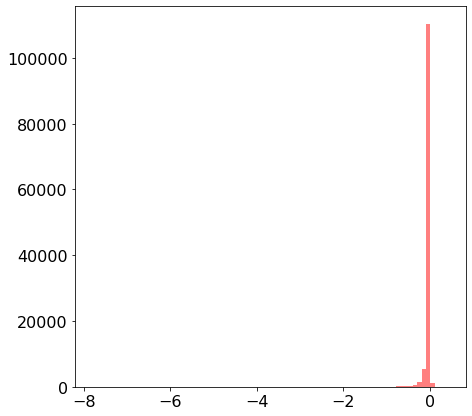

In [44]:
binwidth = 0.1
mindata = min(np.amin(dds_iceice_rand), np.amin(dds_iceagg_rand), np.amin(dds_aggagg_rand))
maxdata = max(np.amax(dds_iceice_rand), np.amax(dds_iceagg_rand), np.amax(dds_aggagg_rand))
bins=np.arange(mindata, maxdata + binwidth, binwidth)
_, n,bins = plt.hist(dds_aggagg_rand.ravel(), color='r', alpha=0.5, bins=bins, label='agg-agg')
_, n,bins = plt.hist(dds_iceagg_rand.ravel(), color='b', alpha=0.5, bins=bins, label='ice-agg')
_, n,bins = plt.hist(dds_iceice_rand.ravel(), color='g', alpha=0.5, bins=bins, label='ice-ice')

plt.gca().set(xlabel='Density Change', ylabel='Frequency');
plt.xlim(-.25, 0.05)
plt.legend()
plt.title('Flat Orientation')
plt.savefig('../plots/dd_rand_hist.png')

0
1
2


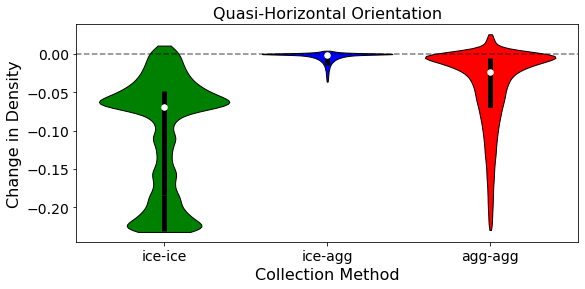

In [38]:
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value


def set_axis_style(ax, labels):
    ax.get_xaxis().set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(0, len(labels)))
    ax.set_xticklabels(labels, fontsize=14)
    ax.tick_params(axis='y', which='major', labelsize=14)
    ax.set_xlabel('Collection Method', fontsize=16)
    ax.set_title('Quasi-Horizontal Orientation', fontsize=16)
    
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 4))
colors=['g','b','r']
dataset = [dds_iceice_flat.ravel(), dds_iceagg_flat.ravel(), dds_aggagg_flat.ravel()]
for c, data in enumerate(dataset): 
    data= data[(data<np.quantile(data, .95)) & (data>np.quantile(data, .05))]
    print(c)
    if c == 2:
        points = 1000
    else:
        points = 100
    parts = ax.violinplot(data,showmeans=False, showmedians=False,
            showextrema=False, positions=[c], widths =0.8)
    for pc in parts['bodies']:
        pc.set_facecolor(colors[c])
        pc.set_edgecolor('black')
        pc.set_alpha(1)

    quartile1, median, quartile3 = np.percentile(data, [25, 50, 75])
    ax.scatter(c, median, marker='o', color='white', s=30, zorder=3)
    whiskers = np.array([adjacent_values(data, quartile1, quartile3)])
    whiskersMin, whiskersMax = whiskers[:, 0], whiskers[:, 1]
    ax.vlines(c, quartile1, quartile3, color='k', linestyle='-', lw=5)
    ax.vlines(c, whiskersMin, whiskersMax, color='k', linestyle='-', lw=5)
    
plt.axhline(y=0.0, color='k', linestyle='--', alpha = 0.5)
ax.set_ylabel('Change in Density', fontsize=16)
#ax.set_ylim(-0.6, 0.5)
# set style for the axes
labels = ['ice-ice', 'ice-agg', 'agg-agg']
set_axis_style(ax, labels)
plt.show()

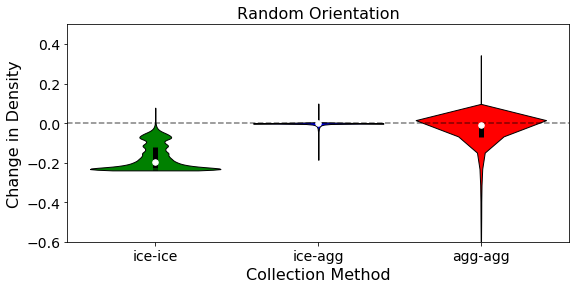

In [20]:
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value

def set_axis_style(ax, labels):
    ax.get_xaxis().set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(0, len(labels)))
    ax.set_xticklabels(labels, fontsize=14)
    ax.tick_params(axis='y', which='major', labelsize=14)
    ax.set_xlabel('Collection Method', fontsize=16)
    ax.set_title('Random Orientation', fontsize=16)
    
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 4))
colors=['g','b','r']

dataset = [dds_iceice_rand.ravel(), dds_iceagg_rand.ravel(), dds_aggagg_rand.ravel()]
for c, data in enumerate(dataset): 
    if c == 2:
        points = 1000
    else:
        points = 100
    parts = ax.violinplot(data, showmeans=False, showmedians=False,
            showextrema=False, positions=[c], widths =0.8)
    for pc in parts['bodies']:
        pc.set_facecolor(colors[c])
        pc.set_edgecolor('black')
        pc.set_alpha(1)

    quartile1, median, quartile3 = np.percentile(data, [25, 50, 75])
    ax.scatter(c, median, marker='o', color='white', s=30, zorder=3)
    whiskers = np.array([adjacent_values(data, quartile1, quartile3)])
    whiskersMin, whiskersMax = whiskers[:, 0], whiskers[:, 1]
    ax.vlines(c, quartile1, quartile3, color='k', linestyle='-', lw=5)
    ax.vlines(c, whiskersMin, whiskersMax, color='k', linestyle='-', lw=5)
    
plt.axhline(y=0.0, color='k', linestyle='--', alpha = 0.5)
ax.set_ylabel('Change in Density', fontsize=16)
ax.set_ylim(-0.6, 0.5)
# set style for the axes
labels = ['ice-ice', 'ice-agg', 'agg-agg']
set_axis_style(ax, labels)
plt.show()